In [1]:
using Distributions
using StatsPlots
using StatsBase
using KernelDensity
using Turing

using Logging
using LaTeXStrings

using StatRethink

Code 3.1

In [2]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
tmp = Pr_Positive_Vampire * Pr_Vampire
Pr_Positive = tmp + Pr_Positive_Mortal * (1 - Pr_Vampire)
Pr_Vampire_Positive = tmp / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

Code 3.2

In [3]:
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(9, p), 6) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior);

Code 3.3

In [4]:
samples_count = 10_000
cat = Categorical(posterior);
indices = rand(cat, samples_count)
samples = p_grid[indices];

Code 3.4

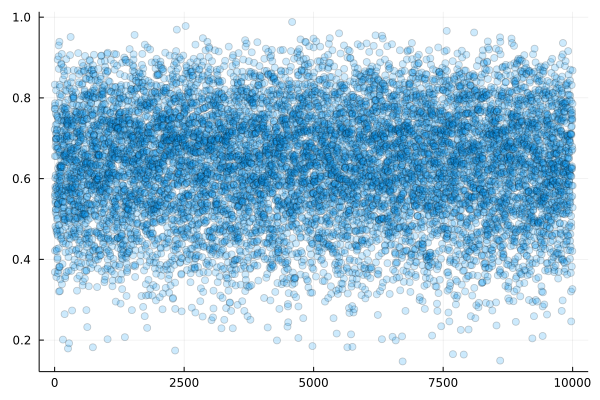

In [5]:
scatter(samples; alpha=0.2, legend=false)

Code 3.5

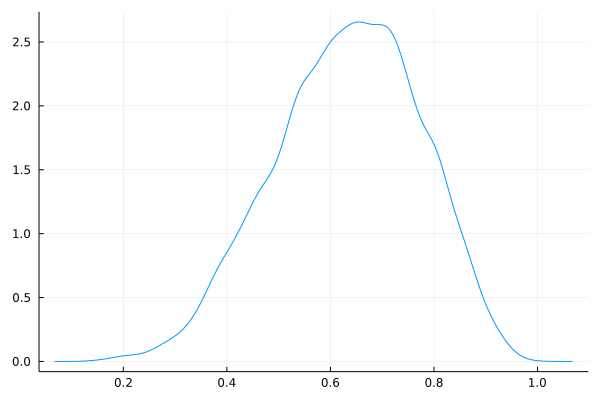

In [6]:
density(samples; legend=false)

Code 3.6

In [7]:
sum(posterior[p_grid .< 0.5])

0.17187458902022867

Code 3.7

In [8]:
sum(samples .< 0.5) / samples_count

0.1799

Code 3.8

In [9]:
sum(@. (samples > 0.5) & (samples < 0.75)) / samples_count

0.6072

Code 3.9

In [10]:
quantile(samples, 0.8)

0.7567567567567568

Code 3.10

In [11]:
quantile(samples, [0.1, 0.9])

2-element Array{Float64,1}:
 0.44144144144144143
 0.8108108108108109

Code 3.11

In [12]:
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(3, p), 3) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior)

samples_count = 10_000
cat = Categorical(posterior);
samples = p_grid[rand(cat, samples_count)];

Code 3.12

In [13]:
percentile(samples, 25), percentile(samples, 75)

(0.7077077077077077, 0.9309309309309309)

Code 3.13

In [14]:
hpdi(samples, alpha=0.5)

2-element Array{Float64,1}:
 0.8408408408408409
 0.998998998998999

Code 3.14

In [15]:
p_grid[argmax(posterior)]

1.0

Code 3.15

In [16]:
k = kde(samples, bandwidth=0.01)
k.x[argmax(k.density)]

0.9788324132632877

Code 3.16

In [17]:
mean(samples), median(samples)

(0.8009825825825825, 0.8423423423423424)

Code 3.17

In [18]:
sum(@. posterior * abs(0.5 - p_grid))

0.31287518749981214

Code 3.18

In [19]:
loss = map(d -> sum(@. posterior * abs(d - p_grid)), p_grid);

Code 3.19

In [20]:
p_grid[argmin(loss)]

0.8408408408408409

Code 3.20

In [21]:
[pdf(Binomial(2, 0.7), n) for n ∈ 0:2]

3-element Array{Float64,1}:
 0.09000000000000001
 0.42000000000000004
 0.48999999999999994

Code 3.21

In [22]:
rand(Binomial(2, 0.7))

2

Code 3.22

In [23]:
s = rand(Binomial(2, 0.7), 10)
println(s)

[1, 2, 2, 1, 0, 2, 1, 1, 1, 2]


Code 3.23

In [24]:
dummy_w = rand(Binomial(2, 0.7), 100_000);
proportions(dummy_w)  # or counts(dummy_w)/100000

3-element Array{Float64,1}:
 0.09172000000000001
 0.42105000000000004
 0.48723000000000005

Code 3.24

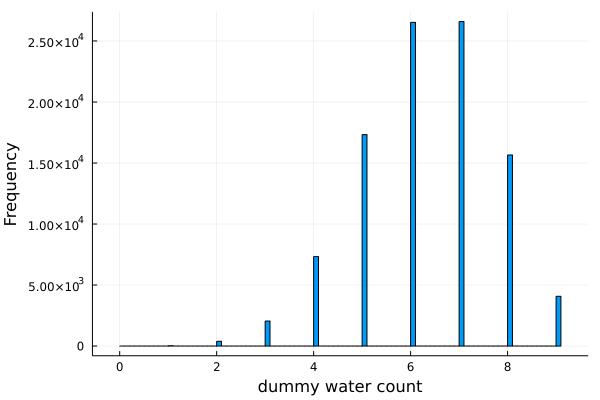

In [25]:
dummy_w = rand(Binomial(9, 0.7), 100_000);
histogram(dummy_w; legend=false, xlabel="dummy water count", ylabel="Frequency")

Code 3.25

In [26]:
w = rand(Binomial(9, 0.6), 10_000);

Code 3.26

In [27]:
w = [rand(Binomial(9, p)) for p in samples];